In [98]:
import numpy as np
import matplotlib.pylab as plt
from statsmodels.stats.weightstats import *
import scipy.stats as stats
import pandas as pd
from sklearn import model_selection, linear_model, tree, metrics, ensemble

0.0269


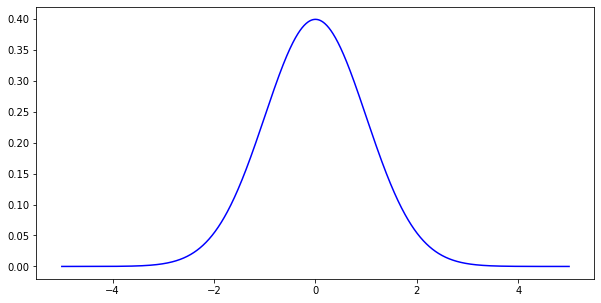

In [73]:
healthy_women_mean = 9.5
healthy_women_std = 0.4
pregnant_women_mean = 9.57
n = 160
x = np.linspace(-5,5,1000)
plt.figure(figsize=(10,5))
plt.plot(x, stats.norm.pdf(x), color='blue')
Z = (pregnant_women_mean - healthy_women_mean) / (healthy_women_std / np.sqrt(n))
print(f"{2 * stats.norm.sf(abs(Z)):.4f}")

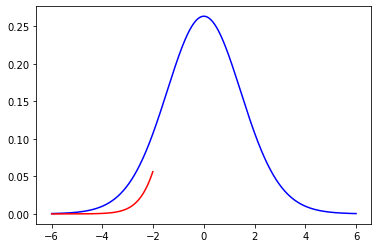

In [54]:
"""
baby_norm = 3300
baby_bad = 2800
n = 25
babe_bad_program = 3075
x = np.linspace(-6,6,1000)
plt.plot(x, stats.t(df=n-1, scale=1.5).pdf(x), color='b')
y = list(filter(lambda a: a<-2, x))

plt.plot(y, stats.t(df=n-1).pdf(y), color='r')

sumator = 0
for i in range(1, len(x)):
    _ = x[i]
    if _ > -2:
        break
    else:
        sumator += (_ - x[i-1]) * stats.t(df=n-1).pdf(_)

sumator * 2
"""

In [76]:
diamonds_data = pd.read_csv('diamonds.txt', header=0, sep='\t')

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [81]:
train, test = model_selection.train_test_split(diamonds_data, test_size=0.25, random_state=1)

In [88]:
X_train = train.drop('price', axis=1).values
y_train = train['price'].values
X_test = test.drop('price', axis=1).values
y_test = test['price'].values

In [97]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
metrics.mean_absolute_error(y_test, linear_regression.predict(X_test))

890.3764004285592

In [99]:
random_forest = ensemble.RandomForestRegressor(n_estimators=10, random_state=1)
random_forest.fit(X_train, y_train)
metrics.mean_absolute_error(y_test, random_forest.predict(X_test))

802.9205172724115

In [100]:
import scipy.stats as stats

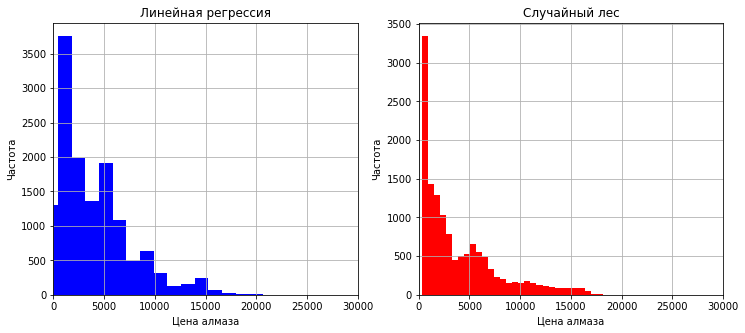

In [157]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=False, figsize=(12,5))
ax[0].set_xlabel('Цена алмаза')
ax[1].set_xlabel('Цена алмаза')
ax[0].set_ylabel('Частота')
ax[1].set_ylabel('Частота')
ax[0].hist(linear_regression.predict(X_test), bins=30, color='b')
ax[0].grid()
ax[0].set_title('Линейная регрессия')
ax[0].set_xlim([0, 30000])
ax[1].hist(random_forest.predict(X_test), bins=30, color='r')
ax[1].set_xlim([0, 30000])
ax[1].grid()
ax[1].set_title('Случайный лес')
plt.show()



In [165]:
forest_mod = np.array(list(map(lambda t,t1: abs(t-t1), random_forest.predict(X_test), y_test)))
linear_mod= np.array(list(map(lambda t,t1: abs(t - t1), linear_regression.predict(X_test), y_test)))

ShapiroResult(statistic=0.8758517503738403, pvalue=3.0086070847722514e-37)

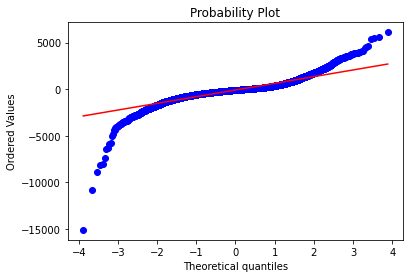

In [169]:
stats.probplot(forest_mod - linear_mod, dist="norm", plot=plt)
stats.shapiro(forest_mod[:2000] - linear_mod[:2000])

In [173]:
stats.ttest_rel(linear_mod, forest_mod)

Ttest_relResult(statistic=13.017729783878393, pvalue=1.655174575144972e-38)

In [174]:
from statsmodels.stats.weightstats import *
compare_Means = CompareMeans(DescrStatsW(linear_mod), DescrStatsW(forest_mod))
print(compare_Means.tconfint_diff(alpha=0.05))

(59.8319483338272, 115.07981797846753)


In [176]:
print(DescrStatsW(linear_mod - forest_mod).tconfint_mean(alpha=.05))

(74.2872453259534, 100.62452098634195)
